<font size="+2" color="blue">Additional results: tags</font>

# Practice Session PS05: Recommendation engines (Content-based)

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from math import*
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1. Load and join the dataset

In [ ]:
# Leave this code as-is

FILENAME_MOVIES = "movies-2000s.csv"
FILENAME_RATINGS = "ratings-2000s.csv"
FILENAME_TAGS = "tags-2000s.csv"

In [ ]:
# Leave this code as-is

movies = pd.read_csv(FILENAME_MOVIES,
                    sep=',',
                    engine='python',
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])
display(movies.head(5))

ratings_raw = pd.read_csv(FILENAME_RATINGS,
                    sep=',',
                    encoding='latin-1',
                    engine='python',
                    names=['user_id', 'movie_id', 'rating'])
display(ratings_raw.head(5))

,movie_id,title,genres
0,2769,"Yards, The (2000)",Crime|Drama
1,3177,Next Friday (2000),Comedy
2,3190,Supernova (2000),Adventure|Sci-Fi|Thriller
3,3225,Down to You (2000),Comedy|Romance
4,3228,Wirey Spindell (2000),Comedy


,user_id,movie_id,rating
0,4,1,3.0
1,4,260,3.5
2,4,296,4.0
3,4,541,4.5
4,4,589,4.0


<font size="+1" color="red">Replace this cell with your own code to add a `year` column to the `movies` dataframe.</font>

In [ ]:
def yearof(title):
    # Use a regular expression to find the year in parentheses
    match1 = re.search(r'\((\d{4})\)', title)
    if match1:
        return int(match1.group(1))  # Extract the year as an integer
    return None

In [ ]:
movies['year'] = movies.apply(lambda x: yearof(x['title']), axis=1)

<font size="+1" color="red">Replace this cell with a brief commentary indicating on which field you can join ratings_raw and movies.</font>

To join the ratings_raw and movies dataframes, we could use the movie_id field. This field is common to both dataframes:

- The ratings_raw dataframe contains user ratings for movies and includes a movie_id column that corresponds to the movies rated by each user.

- The movies dataframe includes information about each movie, such as the movie_id, title, genres, and year.
Therefore, we can join these two dataframes on the movie_id column to create a unified dataframe (ratings) that combines the ratings with the corresponding movie information.

<font size="+1" color="red">Replace this cell with your own code to join the datasets into a single dataframe named "ratings". Your dataframe should have the following columns: user_id, movie_id, rating, title, genders, year</font>

In [ ]:
ratings = pd.merge(ratings_raw, movies, how='inner', on='movie_id')

<font size="+1" color="red">Replace this cell with your code for find _movies</font>

In [ ]:
# Define the find_movies function
def find_movies(keyword, movies_df):
    # Convert keyword to lowercase for case-insensitive search
    keyword = keyword.lower()

    # Filter movies whose title contains the keyword
    matching_movies = movies_df[movies_df['title'].str.lower().str.contains(keyword)]

    # Print results
    for index, row in matching_movies.iterrows():
        print(f"movie_id: {row['movie_id']}, title: {row['title']}")

In [ ]:
find_movies("Barcelona", movies)

movie_id: 60950, title: Vicky Cristina Barcelona (2008)
movie_id: 182911, title: Barcelona Christmas Night (2015)


# 2. Exploratory Data Analysis

## 2.1. "Rating" variable

In [ ]:
# LEAVE AS-IS

ratings['rating'].describe()

,rating
count,472971.000000
mean,3.462222
std,1.076063
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<font size="+1" color="red">Replace this cell with your code to plot a histogram of ratings. Include in the x axis the rating (1, 2, 3, 4, or 5) and in the y axis the probability of having that rating. Remember to label both axes.</font>

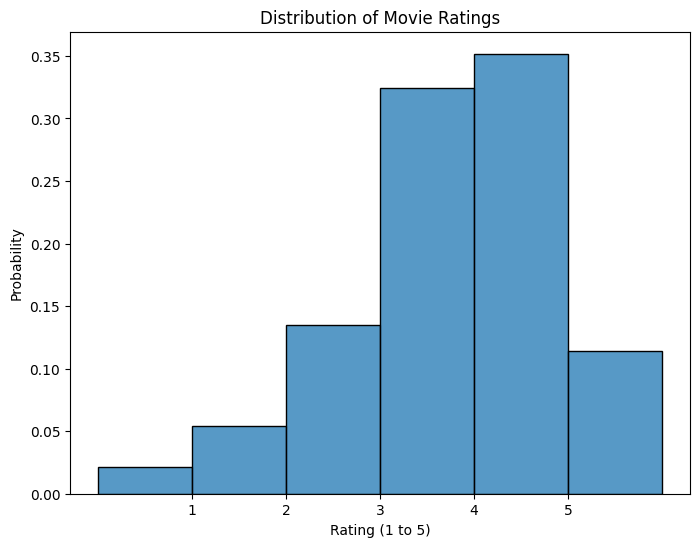

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(ratings['rating'], bins=5, kde=False, stat='probability', discrete=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (1 to 5)')
plt.ylabel('Probability')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe in the distribution of ratings.</font>

The distribution of ratings is skewed towards higher ratings. The most frequent ratings are 4 and 5, which together account for a large portion of the data. Ratings of 3 are also common, while lower ratings (1 and 2) are much less frequent.
This suggests that users generally tend to rate movies positively, with a small percentage giving negative or very low ratings.


<font size="+1" color="red">Replace this cell with code to print the 10 movies with the most "good" ratings (i.e., ratings that are larger than 4.5), and the 10 movies with the most "bad" ratings (i.e., ratings than are smaller than 1.5)</font>

In [ ]:
# Step 1: Create dataframes for good and bad ratings
good_ratings = ratings[ratings['rating'] > 4.5]
bad_ratings = ratings[ratings['rating'] < 1.5]

# Step 2: Find the 10 movies with the most "good" ratings
top_good_movies = good_ratings['title'].value_counts().nlargest(10)
print("Top 10 movies with the most good ratings (rating > 4.5):")
print(top_good_movies)

# Step 3: Find the 10 movies with the most "bad" ratings
top_bad_movies = bad_ratings['title'].value_counts().nlargest(10)
print("\nTop 10 movies with the most bad ratings (rating < 1.5):")
print(top_bad_movies)


Top 10 movies with the most good ratings (rating > 4.5):
title
Lord of the Rings: The Fellowship of the Ring, The (2001)    1973
Lord of the Rings: The Return of the King, The (2003)        1806
Lord of the Rings: The Two Towers, The (2002)                1693
Memento (2000)                                               1255
Gladiator (2000)                                             1156
Amelie (Fabuleux destin d'AmÃ©lie Poulain, Le) (2001)        1116
Eternal Sunshine of the Spotless Mind (2004)                  959
Spirited Away (Sen to Chihiro no kamikakushi) (2001)          862
Shrek (2001)                                                  734
Kill Bill: Vol. 1 (2003)                                      718
Name: count, dtype: int64

Top 10 movies with the most bad ratings (rating < 1.5):
title
Battlefield Earth (2000)                                     277
Charlie's Angels (2000)                                      236
Scary Movie (2000)                                        

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe in these lists.</font>

We can see a list of the most bad and good-rated movies. In the good ratings, we see the next films:
- Lord of the Rings: The Fellowship of the Ring, The (2001)
- Lord of the Rings: The Return of the King, The (2003)        
- Lord of the Rings: The Two Towers, The (2002)                
- Memento (2000)                                               
- Gladiator (2000)                                             
- Amelie (Fabuleux destin d'AmÃ©lie Poulain, Le) (2001)        
- Eternal Sunshine of the Spotless Mind (2004)                 
- Spirited Away (Sen to Chihiro no kamikakushi) (2001)       
- Shrek (2001)                                                  
- Kill Bill: Vol. 1 (2003)

These movies are so famous in real life and they were good rated at that moment. So, we can understand the high count of good ratings.

On the other hand, we have the worst rated movies:
- Battlefield Earth (2000)                                     
- Charlie's Angels (2000)                                      
- Scary Movie (2000)                                           
- Star Wars: Episode II - Attack of the Clones (2002)          
- Mission: Impossible II (2000)                                
- Lord of the Rings: The Return of the King, The (2003)        
- Lord of the Rings: The Fellowship of the Ring, The (2001)    
- American Pie 2 (2001)                                        
- Pearl Harbor (2001)                                          
- Scream 3 (2000)

We can see similar movies related to the other list:
- Lord of the Rings: The Return of the King, The (2003)        
- Lord of the Rings: The Fellowship of the Ring, The (2001)

If we compare the two lists, we see more positive ratings than negative ratings. The films were so famous that the bad ratings were increased by minority users. But the main eye sight was positive.

The bad-rated films have a high count but not so many as good ratings.
However, if we saw the positive score count , maybe it is higher.

Additionally, the audience is more likely to score positive ratings than negative ratings.

## 2.2. Genres distribution

<font size="+1" color="red">Replace this cell with code to list all genres in the dataset. Verify the list has 20 genres with an assert, as follows:
    assert(n == 20).</font>

In [ ]:
# Step 1: Split the 'genres' column into individual genres
all_genres = movies['genres'].str.split('|').explode().unique()

# Step 2: Convert to a list for easy manipulation
genres_list = sorted(list(all_genres))

# Step 3: Verify that there are exactly 20 genres
n = len(genres_list)
assert(n == 20), f"Expected 20 genres, but found {n}"

# Step 4: Display the list of genres
print("List of all genres in the dataset:")
print(genres_list)

List of all genres in the dataset:
['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


<font size="+1" color="red">Replace this cell with code to obtain the frequency of each genre in the dataset, check that it returns the same result as above. Create a function that receives all relevant arguments and returns the dataframe (feel free to use auxiliary functions). Do not use global variables.</font>

In [ ]:
# Define a function to count genre frequencies
def count_genres(movies_df):
    all_genres = movies_df['genres'].str.split('|').explode()
    genre_count = all_genres.value_counts().reset_index()
    genre_count.columns = ['genre', 'count']
    return genre_count

In [ ]:
genre_count = count_genres(movies)
genre_count.head()

,genre,count
0,Drama,13666
1,Comedy,8898
2,Thriller,5437
3,Documentary,4473
4,Action,3901


<font size="+1" color="red">Replace this cell with code to produce two bar plots: one for movies filmed on 2005 or before, and another for movies filmed on 2016 or later.</font>

In [ ]:
# Step 1: Define a function to count and plot genre distributions based on a given year range
def plot_genre_distribution(movies_df, year_condition, title):
    filtered_movies = movies_df[year_condition]
    genre_count = count_genres(filtered_movies)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=genre_count, x='count', y='genre', orient='h')
    ax.set(title=title, xlabel='Number of Movies', ylabel='Genre')
    plt.show()

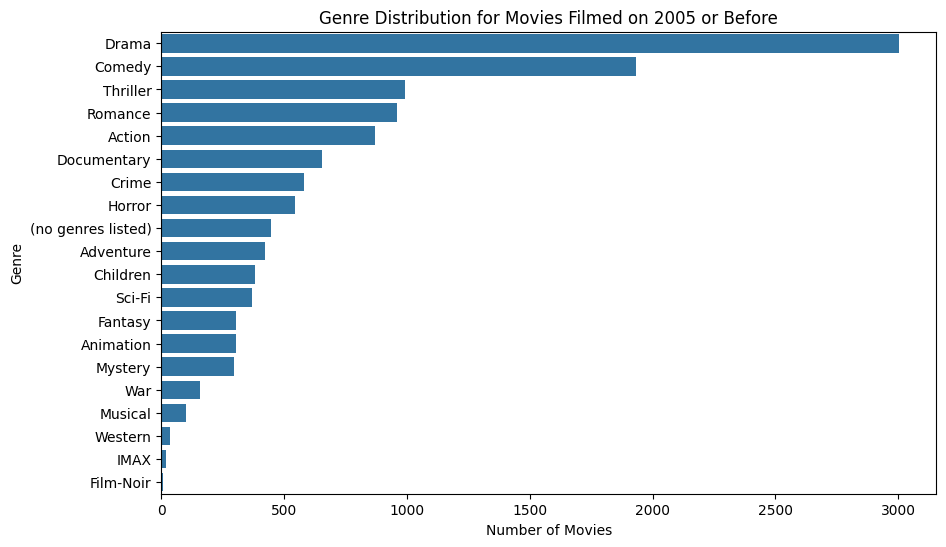

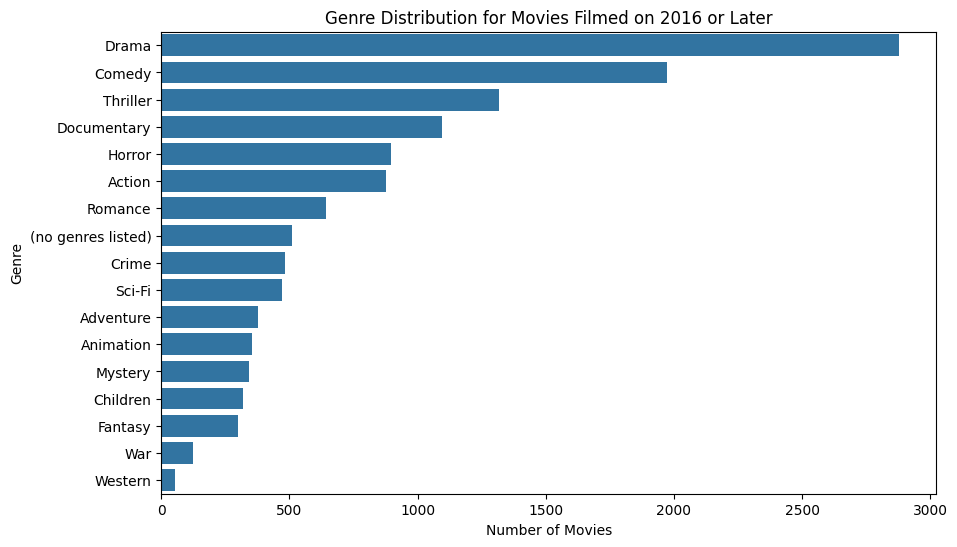

In [ ]:
# Step 2: Plot for movies filmed on 2005 or before
plot_genre_distribution(movies, movies['year'] <= 2005, 'Genre Distribution for Movies Filmed on 2005 or Before')

# Step 3: Plot for movies filmed on 2016 or later
plot_genre_distribution(movies, movies['year'] >= 2016, 'Genre Distribution for Movies Filmed on 2016 or Later')

<font size="+1" color="red">Replace this cell with a brief commentary comparing both distributions, including which genres changed popularity.</font>

There are some genres maintain relatively stable representation across both periods (eg: Drama, Comedy, Thriller).
But there are so many changes between before 2005 and after 2016.
- There are more no genre movies in the popularity.
- The documentary get a high popularity after 2016 and, on before 2005, was not in the top . The same case with Thriller and Horror genres. From 2005 to 2016, they got more popularity.
- Romance and Action appear to have fewer movies in the later period, suggesting a potential decline in their relative popularity.
- Genres like War, Musical, Western, IMAX, and Film-Noir show a noticeable decrease, with some like Film-Noir nearly absent in the later years.

# 3. Content-based recommendation

## 3.1. Compute TF-IDF vectors

<font size="+1" color="red">Replace this cell with your code to add column "genres_arr" to the dataframe "movies".</font>

In [ ]:
movies['genres'] = movies['genres'].fillna('').astype('str')
movies['genres_arr'] = movies['genres'].apply(lambda x: x.split('|'))

In [ ]:
# Leave this code as-is

print("Transformed: %s → %s" % (movies['genres'][3], movies['genres_arr'][3]))

Transformed: Comedy|Romance → ['Comedy', 'Romance']


In [ ]:
# LEAVE AS-IS

# The reset-index is important to match row/column numbers in the tdifd-matrix

movies_filtered = movies[movies.year >= 2016]
movies_filtered = movies_filtered.reset_index()
display(movies_filtered.head(5))

,index,movie_id,title,genres,year,genres_arr
0,10897,122888,Ben-hur (2016),(no genres listed),2016,[(no genres listed)]
1,10898,122890,Warcraft (2016),Action|Adventure|Fantasy,2016,"[Action, Adventure, Fantasy]"
2,10900,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017,[(no genres listed)]
3,10901,122898,Justice League (2017),Action|Adventure|Sci-Fi,2017,"[Action, Adventure, Sci-Fi]"
4,10904,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,2016,"[Action, Adventure, Comedy, Sci-Fi]"


<font size="+1" color="red">Replace this cell with your code to generate "tfidf_matrix"</font>

In [ ]:
# Step 1: Convert the list of genres into a single string for each movie
movies_filtered['genres_str'] = movies_filtered['genres_arr'].apply(lambda x: ' '.join(x))

# Step 2: Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer(token_pattern=None,tokenizer=lambda x: x.split(),ngram_range=(1, 2))

# Step 3: Fit and transform the genres_str to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_filtered['genres_str'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (7890, 128)


## 3.2. Calculate most similar movies

In [ ]:
# Leave this code as-is

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.         1.         ... 1.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [1.         0.         1.         ... 1.         0.         0.        ]
 ...
 [1.         0.         1.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.41022264]
 [0.         0.         0.         ... 0.         0.41022264 1.        ]]


In [ ]:
# Leave this code as-is

# Create an index to convert from numbers to movie_id
movie_id_to_index = pd.Series(movies_filtered.index, index=movies_filtered['movie_id'])

# Print the similarity vector
def print_similarity_vector(movie_id, similarities):

    # Determine the index of the movie_id
    index_source = movie_id_to_index[movie_id]

    # Get the row in the similarities matrix
    sim_scores = list(similarities[index_source])

    # Iterate through that row
    for index_target in range(len(sim_scores)):
        print("%.3f %d %s" %
              (sim_scores[index_target], movies_filtered.iloc[index_target].movie_id, movies_filtered.iloc[index_target].title))

print_similarity_vector(122904, cosine_sim)

Se han truncado las últimas 5000 líneas del flujo de salida.
0.176 180569 The Star (2017)
0.000 180571 The Mayor (2017)
0.000 180587 The Wife (2017)
0.000 180589 Leaning Into the Wind: Andy Goldsworthy (2017)
0.000 180591 Jane (2017)
0.066 180677 Child of Satan (2016)
0.063 180685 Before the Fall (2016)
0.000 180735 Hello Again (2017)
0.000 180737 A Christmas Prince (2017)
0.000 180763 LoveTrue (2016)
0.070 180793 Evil Bong: High 5 (2016)
0.000 180825 Pecking Order (2017)
0.255 180833 The Humanity Bureau (2017)
0.000 180835 The Lost Wife of Robert Durst (2017)
0.000 180837 Tokyo Project (2017)
0.000 180841 Interlude In Prague (2017)
0.176 180843 Schreckenstein Castle (2016)
0.000 180859 Bruce Springsteen: In His Own Words (2016)
0.000 180861 Ceasefire (2017)
0.000 180919 Starfish (2016)
0.194 180953 The Carer (2016)
0.000 180957 Eric Clapton: Life in 12 Bars (2017)
0.194 180959 The Bribe of Heaven (2016)
0.056 180965 The Healer (2017)
0.000 180973 Memoria (2016)
0.130 180975 Agadah (20

<font size="+1" color="red">Replace this cell with your code for "genre_content_based_recommendations"</font>

In [ ]:
def genre_content_based_recommendations(movie_id, movies, similarities, num_movies=10):

    index_source = movie_id_to_index[movie_id]

    # Replace this comment with code to produce top_similarities
    # Extract similarities for the specific movie
    movie_similarities = similarities[index_source]

    # Enumerate and sort similarities to get top recommendations
    enumerated = list(enumerate(movie_similarities))
    sorted_similarities = sorted(enumerated, key=lambda x: x[1], reverse=True)
    top_similarities = sorted_similarities[0:num_movies]

    recommendations = []
    for (index_target, similarity) in top_similarities:

        # Replace this comment with code to obtain movie_id, title, genres
        target_movie = movies.iloc[index_target]
        movie_id_target = target_movie['movie_id']
        title = target_movie['title']
        genres = target_movie['genres_str']

        recommendations.append({
                'movie_id': movie_id,
                'title': title,
                'genres': genres,
                'similarity': similarity
            }
        )

    return pd.DataFrame.from_records(recommendations, columns=['similarity', 'movie_id', 'title', 'genres'])

<font size="+1" color="red">Replace this cell with code to print the top 10 recommendations for movie "Pirates of the Caribbean" (movie_id=122896) and "Midsommer" (movie_id=201646).</font>

In [ ]:
# Print recommendations for "Pirates of the Caribbean"
pirates_recommendations = genre_content_based_recommendations(122896, movies_filtered, similarities=cosine_sim)
print("Top 10 Recommendations for 'Pirates of the Caribbean':")
print(pirates_recommendations)

# Print recommendations for "Midsommer"
midsommer_recommendations = genre_content_based_recommendations(201646, movies_filtered, similarities=cosine_sim)
print("\nTop 10 Recommendations for 'Midsommer':")
print(midsommer_recommendations)

Top 10 Recommendations for 'Pirates of the Caribbean':
   similarity  movie_id                                              title  \
0         1.0    122896                                     Ben-hur (2016)   
1         1.0    122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
2         1.0    122896   Fantastic Beasts and Where to Find Them 2 (2018)   
3         1.0    122896                                    Spectral (2016)   
4         1.0    122896                                   Guardians (2016)   
5         1.0    122896                             Pitch Perfect 3 (2017)   
6         1.0    122896                                    Army Dog (2016)   
7         1.0    122896                                      Fitoor (2016)   
8         1.0    122896                                     Martyrs (2016)   
9         1.0    122896                                 Grease Live (2016)   

               genres  
0  (no genres listed)  
1  (no genres listed)  
2  (no genres 

<font size="+1" color="red">Replace this cell with code to get the list of recommendation for three movies you are familiar with. Indicate the **precision** of each list, which is the percentage of recommended movies that *you* consider relevant (mark manually as "relevant" or "irrelevant" each recommendation). Indicate the **average precision** across the three lists.</font>

In [ ]:
movie_ids = [122904, 188307, 196339]

# Initialize a list to hold precision values
precision_values = []
relevance_marks=[]
relevance_marks_list = [
    [
        (0, "relevant"), (1, "irrelevant"), (2, "relevant"),
        (3, "irrelevant"), (4, "irrelevant"), (5, "irrelevant"),
        (6, "relevant"), (7, "relevant"), (8, "irrelevant"), (9, "irrelevant")
    ],
    [
        (0, "relevant"), (1, "relevant"), (2, "irrelevant"),
        (3, "relevant"), (4, "irrelevant"), (5, "relevant"),
        (6, "irrelevant"), (7, "relevant"), (8, "relevant"), (9, "irrelevant")
    ],
    [
        (0, "irrelevant"), (1, "relevant"), (2, "irrelevant"),
        (3, "relevant"), (4, "relevant"), (5, "relevant"),
        (6, "relevant"), (7, "relevant"), (8, "relevant"), (9, "relevant")
    ]
]


# Get recommendations for each movies
for movie_id in movie_ids:
    recommendations = genre_content_based_recommendations(movie_id, movies_filtered, similarities=cosine_sim)[1::]

    # Manually mark recommendations as "relevant" or "irrelevant"
    i=movie_ids.index(movie_id)
    relevance_marks=relevance_marks_list[i]

    # Calculate precision
    relevant_count = sum(1 for _, mark in relevance_marks if mark == "relevant")
    total_recommendations = len(recommendations)
    precision = relevant_count / total_recommendations if total_recommendations > 0 else 0

    precision_values.append(precision)

    # Print the recommendations and their relevance
    print(f"\nRecommendations for movie ID {movie_id}, title {movies.loc[movies['movie_id'] == movie_id, 'title']}:")
    for index, row in recommendations.iterrows():
        relevance = "Relevant" if relevance_marks[index][1] == "relevant" else "Irrelevant"
        print(f"{row['title']} (Similarity: {row['similarity']:.2f}) - {relevance}")

# Calculate average precision
index=1
for i in precision_values:
  print(f"\nPrecision list {index}: {i:.2f}")
  index+=1
average_precision = sum(precision_values) / len(precision_values) if precision_values else 0
print(f"\nAverage Precision across the three lists: {average_precision:.2f}")


Recommendations for movie ID 122904, title 10904    Deadpool (2016)
Name: title, dtype: object:
Lazer Team 2 (2017) (Similarity: 1.00) - Irrelevant
Gintama (2017) (Similarity: 1.00) - Relevant
Men in Black: International (2019) (Similarity: 1.00) - Irrelevant
Rim of the World (2019) (Similarity: 1.00) - Irrelevant
Monster Hunt 2 (2018) (Similarity: 0.88) - Irrelevant
Arif V 216 (2018) (Similarity: 0.88) - Relevant
Teenage Mutant Ninja Turtles: Out of the Shadows (2016) (Similarity: 0.79) - Relevant
Bounty Hunters (2016) (Similarity: 0.79) - Irrelevant
Kingsman: The Golden Circle (2017) (Similarity: 0.79) - Irrelevant

Recommendations for movie ID 188307, title 27132    Hotel Transylvania 3: Summer Vacation (2018)
Name: title, dtype: object:
The Addams Family (2019) (Similarity: 0.87) - Relevant
Moana (2016) (Similarity: 0.87) - Irrelevant
The Dragon Spell (2016) (Similarity: 0.87) - Relevant
Puss in Book: Trapped in an Epic Tale (2017) (Similarity: 0.87) - Irrelevant
Olaf's Frozen Adv

<font size="+1" color="red">Replace this cell with ideas on how you would improve **this** content-based recommendations, based on what we discussed in class about content-based recommendations.</font>

I would improve this content-based recommendations with these ideas:
- **Expand Features Beyond Genres:** Use detailed genre weighting to emphasize primary and secondary genres, which define the movie more accurately. Adding directors and actors to the feature set can also improve personalization, as many users prefer films by certain creators or actors. Additionally, incorporating keywords or movie descriptions provides more context, aligning recommendations better with user interests.

- **Refine Similarity Measures:** Besides cosine similarity, other metrics like Jaccard similarity (for genre matching) or adjusted cosine (for user preferences) can enhance accuracy. Combining various similarity scores—such as genres, cast, and keywords—can create a hybrid similarity metric that captures different aspects of user preference.

- **User-Specific Feature Weighting:** Use user profile data to give certain features more weight based on individual preferences. For example, if a user rates a specific genre or actor highly, increase the importance of these attributes in similarity calculations.

In [ ]:
tags_df = pd.read_csv(FILENAME_TAGS,
                    sep=',',
                    encoding='latin-1',
                    engine='python',
                    names=['user_id', 'movie_id', 'tag', 'timestamp'])

In [ ]:
tags_df['tag'] = tags_df['tag'].astype(str).str.lower()  # Ensure all tags are strings and convert to lowercase
tags_df['tag'] = tags_df['tag'].apply(lambda x: re.sub(r'\W+', '', x) if isinstance(x, str) else '')  # Remove special characters

# Group tags by movie
tags_grouped = tags_df.groupby('movie_id')['tag'].apply(lambda x: ' '.join(x.dropna().astype(str))).reset_index()
tags_grouped.columns = ['movie_id', 'tags_str']
movies_extra = movies.merge(tags_grouped, how='inner', on='movie_id')

# Create TfidfVectorizer instance with adjusted parameters
tfidf_vectorizer_tags = TfidfVectorizer(token_pattern=r'\S+', min_df=50, norm='l2')

# Generate the TF-IDF matrix from tags
tfidf_matrix_tags = tfidf_vectorizer_tags.fit_transform(movies_extra['tags_str'].fillna(''))
print(f"TF-IDF matrix shape for tags: {tfidf_matrix_tags.shape}")

# Show the first few features
feature_names = tfidf_vectorizer_tags.get_feature_names_out()
print("\nSample Tags Features:")
print(feature_names)

TF-IDF matrix shape for tags: (1842, 62)

Sample Tags Features:
['acting' 'action' 'adaptedfrombook' 'atmospheric' 'basedonabook'
 'basedonnovelorbook' 'bgablrc' 'biography' 'bobola' 'boring' 'comedy'
 'crime' 'divx' 'documentary' 'drama' 'drugs' 'dvd' 'family' 'friendship'
 'funny' 'gay' 'horror' 'independentfilm' 'lessthan300ratings' 'library'
 'lossoflovedone' 'love' 'movietosee' 'murder' 'music' 'netflix'
 'netflixfinland' 'newyorkcity' 'nudityfullfrontal' 'nuditytopless'
 'nuditytoplessbrief' 'ondvr' 'overrated' 'owned'
 'parentchildrelationship' 'perrotlibrary' 'pg13' 'police' 'predictable'
 'quirky' 'r' 'religion' 'remake' 'revenge' 'romance' 'sequel'
 'serialkiller' 'sex' 'slow' 'soundtrack' 'sport' 'suspense' 'thriller'
 'tosee' 'tumeysdvds' 'violence' 'womandirector']


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>